   RegionID  SizeRank       RegionName RegionType StateName      1/31/2000  \
0    102001         0    United States    country       NaN  121667.513598   
1    394913         1     New York, NY        msa        NY  217199.040475   
2    753899         2  Los Angeles, CA        msa        CA  226479.946785   
3    394463         3      Chicago, IL        msa        IL  153280.174050   
4    394514         4       Dallas, TX        msa        TX  127756.442930   

       2/29/2000      3/31/2000      4/30/2000      5/31/2000  ...  \
0  121881.565758  122147.021954  122716.373388  123371.628627  ...   
1  218122.013849  219053.535620  220941.159182  222895.858748  ...   
2  227322.739542  228445.331457  230678.912262  233121.749432  ...   
3  153422.066839  153692.304155  154364.587439  155173.263367  ...   
4  127813.346096  127878.762110  128048.640629  128272.620804  ...   

       6/30/2024      7/31/2024      8/31/2024      9/30/2024     10/31/2024  \
0  357820.283503  357967.67812

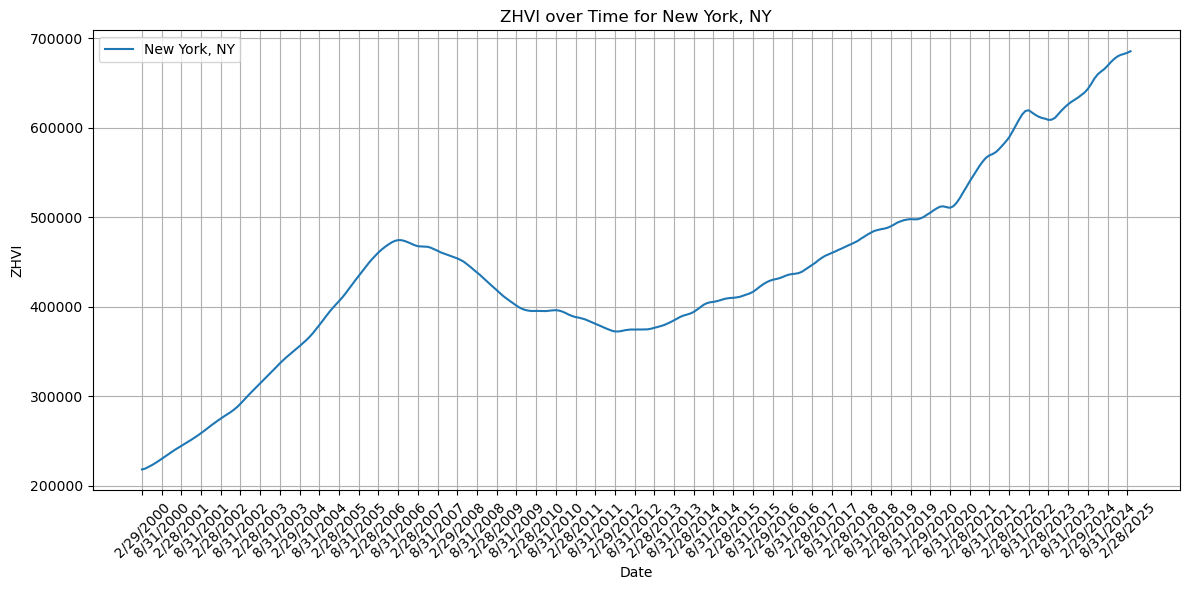

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Plotting the data for a specific region (e.g., New York, NY)
region_name = "New York, NY"
region_data = df[df['RegionName'] == region_name]

# Transpose the data to have dates as rows
region_data_transposed = region_data.set_index('RegionName').T[5:]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(region_data_transposed.index, region_data_transposed[region_name], label=region_name)
plt.xlabel('Date')
plt.ylabel('ZHVI')
plt.title(f'ZHVI over Time for {region_name}')
plt.legend()
plt.xticks(ticks=region_data_transposed.index[::6], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [12]:
import pandas as pd
import plotly.express as px

# Load the datasets
df_zhvi = pd.read_csv('data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_forecast = pd.read_csv('data/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1).csv')

# Function to plot ZHVI and forecasted data for a selected region
def plot_zhvi(region_name):
    region_data = df_zhvi[df_zhvi['RegionName'] == region_name]
    region_data_transposed = region_data.set_index('RegionName').T[5:]
    
    forecast_data = df_forecast[df_forecast['RegionName'] == region_name]
    forecast_data_transposed = forecast_data.set_index('RegionName').T[5:]
    
    fig = px.line(region_data_transposed, x=region_data_transposed.index, y=region_data_transposed[region_name], title=f'ZHVI and Forecasted ZHVI over Time for {region_name}')
    fig.add_scatter(x=forecast_data_transposed.index, y=forecast_data_transposed[region_name], mode='lines', name='Forecasted ZHVI')
    fig.update_layout(xaxis_title='Date', yaxis_title='ZHVI')
    fig.show()

# List of regions
regions = df_zhvi['RegionName'].unique()

# Example usage: Plot ZHVI for New

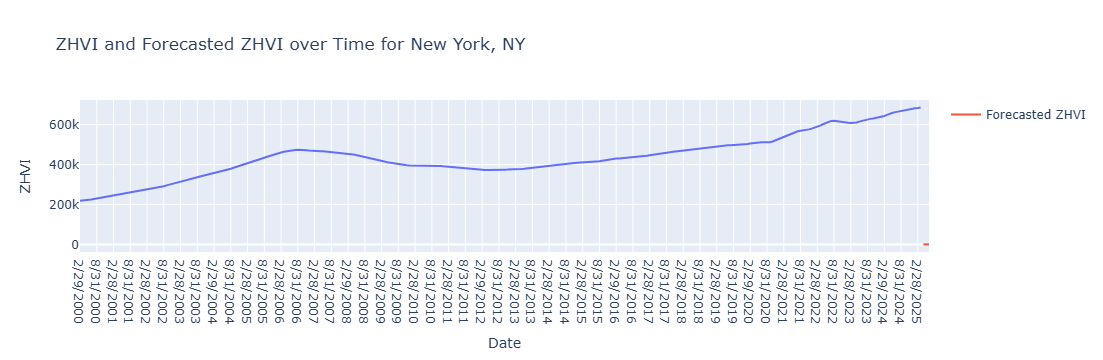

In [14]:
plot_zhvi('New York, NY')

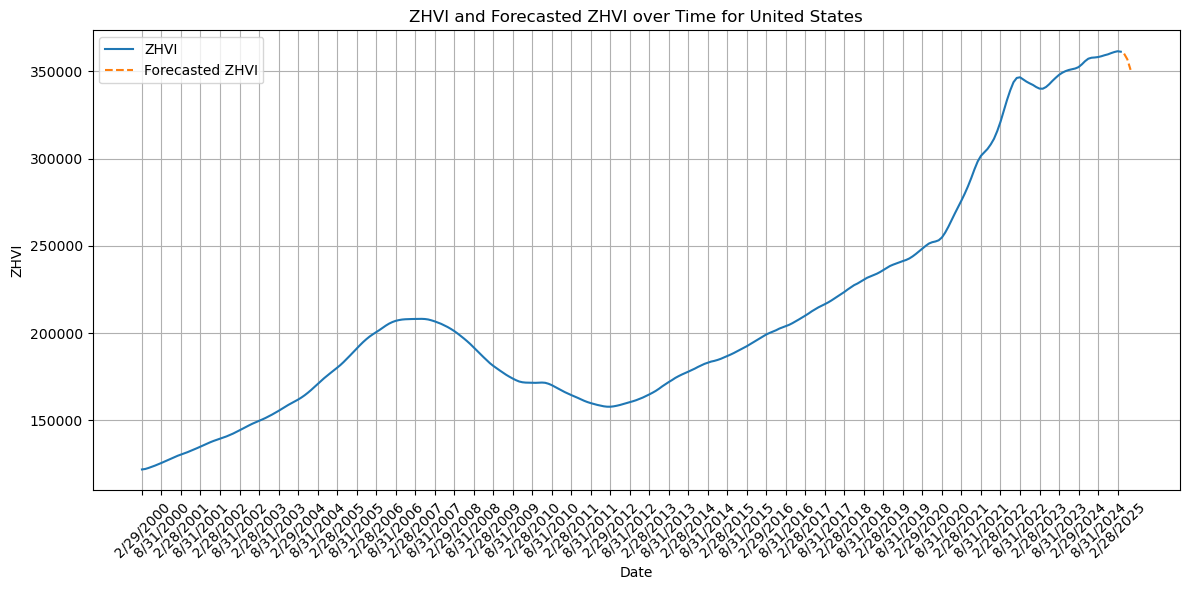

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_zhvi = pd.read_csv('data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_forecast = pd.read_csv('data/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1).csv')

# Function to calculate future home values based on forecasted growth rates
def calculate_future_home_values(region_name):
    # Get the latest ZHVI value for the region
    region_data = df_zhvi[df_zhvi['RegionName'] == region_name]
    latest_zhvi = region_data.iloc[:, -1].values[0]
    
    # Get the forecasted growth rates for the region
    forecast_data = df_forecast[df_forecast['RegionName'] == region_name]
    forecast_growth_rates = forecast_data.iloc[:, 6:].values[0]
    
    # Calculate future home values
    future_home_values = [latest_zhvi]
    for growth_rate in forecast_growth_rates:
        future_value = future_home_values[-1] * (1 + growth_rate / 100)
        future_home_values.append(future_value)
    
    return future_home_values

# Function to plot ZHVI and forecasted home values for a selected region
def plot_zhvi_and_forecast(region_name):
    # Historical ZHVI data
    region_data = df_zhvi[df_zhvi['RegionName'] == region_name]
    region_data_transposed = region_data.set_index('RegionName').T[5:]
    
    # Future home values
    future_home_values = calculate_future_home_values(region_name)
    
    # Dates for future home values
    forecast_dates = ['2025-04-30', '2025-06-30', '2026-03-31']
    
    # Plotting the data
    plt.figure(figsize=(12, 6))
    plt.plot(region_data_transposed.index, region_data_transposed[region_name], label='ZHVI')
    plt.plot(forecast_dates, future_home_values[1:], label='Forecasted ZHVI', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('ZHVI')
    plt.title(f'ZHVI and Forecasted ZHVI over Time for {region_name}')
    plt.legend()
    plt.xticks(ticks=region_data_transposed.index[::6], rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage: Plot ZHVI and forecasted home values for New York, NY
plot_zhvi_and_forecast('United States')


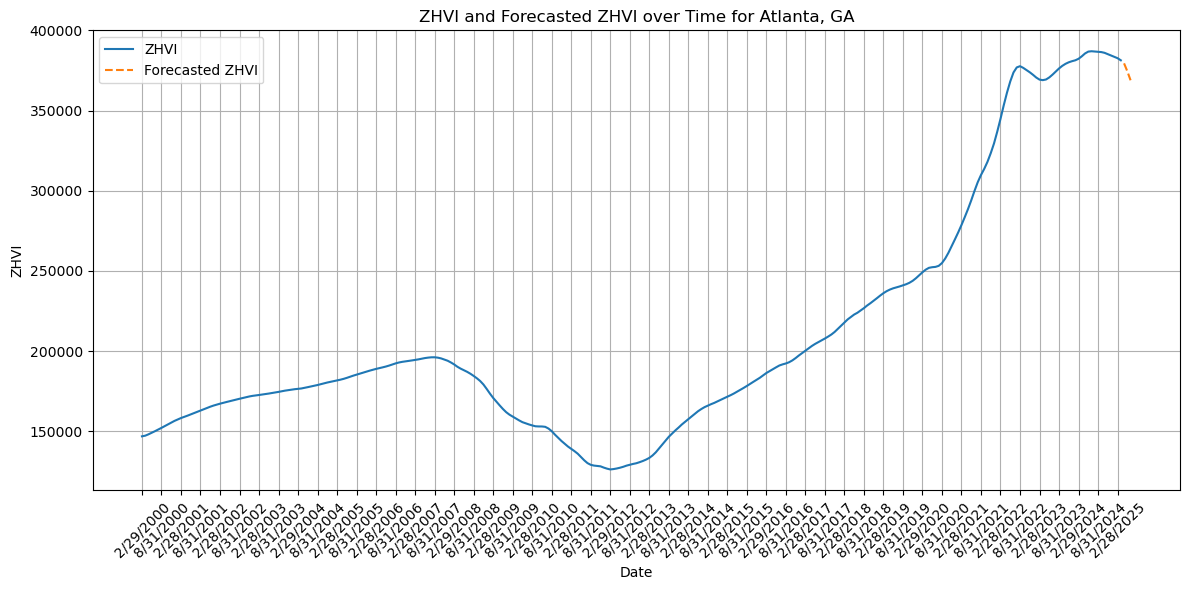

In [37]:
plot_zhvi_and_forecast('Atlanta, GA')

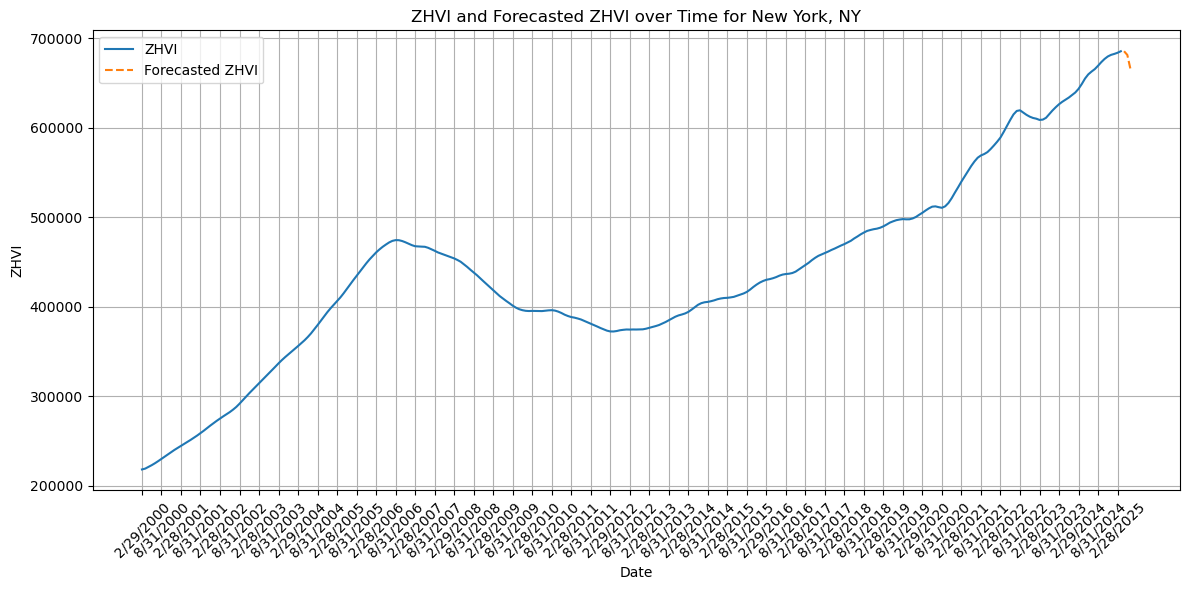

In [39]:
plot_zhvi_and_forecast('New York, NY')

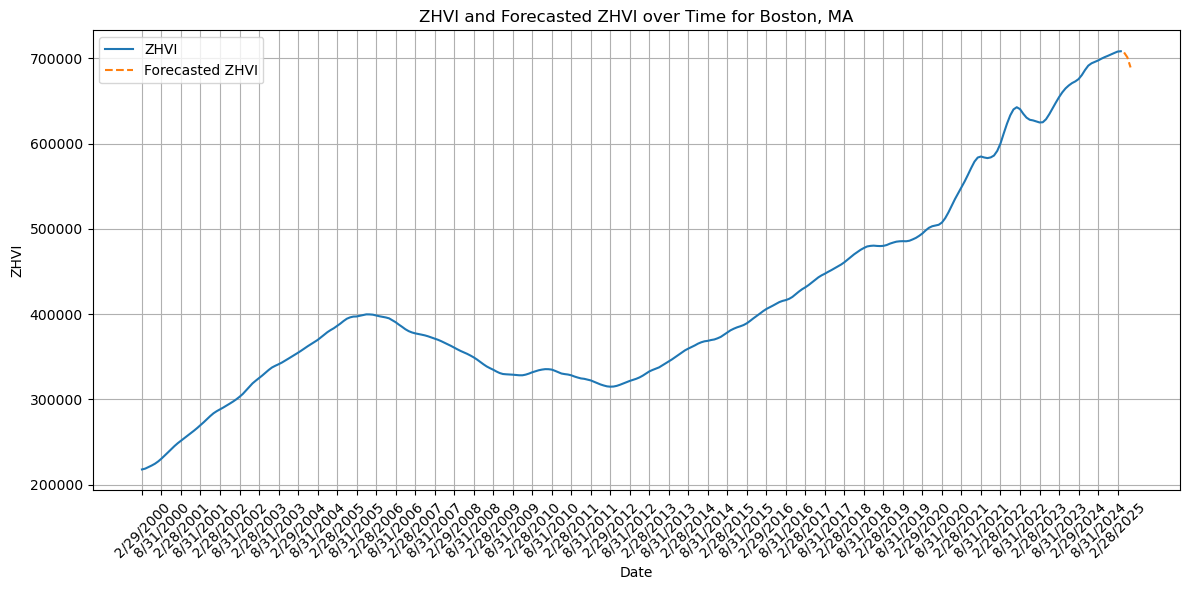

In [41]:
plot_zhvi_and_forecast('Boston, MA')